# Modeling Demand for Cars with the Similarity Model

In this notebook, we will explore the dataset used in
Goldberg and Verboven (2005). We will estimate the Similarity Model
model given the available data using the functions defined below.

Optimization terminated successfully.
         Current function value: 1.588275
         Iterations: 86
         Function evaluations: 1914
         Gradient evaluations: 87


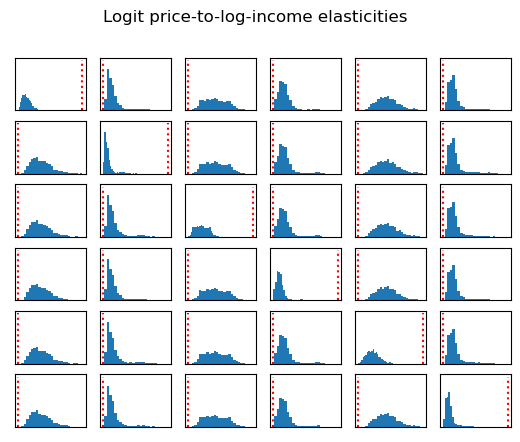

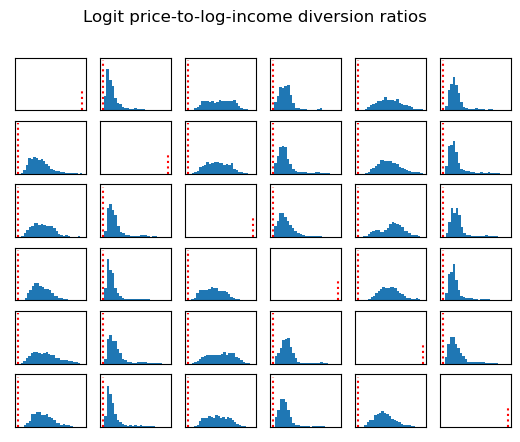

In [2]:
import numpy as np
import pandas as pd 
import os
from numpy import linalg as la
from scipy import optimize
from IPython import display
from matplotlib import pyplot as plt
import itertools as iter

# Files
import Logit_file as logit

# Data

The dataset consists of approximately 150 vehicle makes per year in the period 1970-1999 in five european markets (Belgium, France, germany, Italy, and the United Kingdom). Furthermore, the data contains information on various characteristics of the makes such as sales, prices, and engine type. Also these characteristics may vary across markets. To simplify we focus in on the year 1995.

From this year the dataset consists of $J = 102$ vehicle makes and $T = 5$ markets. We observe aggregate sales of each model $j=1,\ldots,J$ in each market $t=1,\ldots,T$

In [24]:
# Load dataset and variable names
os.chdir('../GREENCAR_notebooks/')
input_path = os.getcwd() # Assigns input path as current working directory (cwd)
lab = (pd.read_stata('eurocars.dta', iterator = True)).variable_labels()
dat = pd.read_csv(os.path.join(input_path, 'eurocars.csv'))

In [42]:
# We subset on data from 1995
data = dat[dat['ye'] == 95]

In [33]:
lab

{'ye': 'year (=first dimension of panel)',
 'ma': 'market (=second dimension of panel)',
 'co': 'model code (=third dimension of panel)',
 'zcode': 'alternative model code (predecessors and successors get same number)',
 'brd': 'brand code',
 'type': 'name of brand and model',
 'brand': 'name of brand',
 'model': 'name of model',
 'org': 'origin code (demand side, country with which consumers associate model)',
 'loc': 'location code (production side, country where producer produce model)',
 'cla': 'class or segment code',
 'home': 'domestic car dummy (appropriate interaction of org and ma)',
 'frm': 'firm code',
 'qu': 'sales (number of new car registrations)',
 'cy': 'cylinder volume or displacement (in cc)',
 'hp': 'horsepower (in kW)',
 'we': 'weight (in kg)',
 'pl': 'places (number, not reliable variable)',
 'do': 'doors (number, not reliable variable)',
 'le': 'length (in cm)',
 'wi': 'width (in cm)',
 'he': 'height (in cm)',
 'li1': 'measure 1 for fuel efficiency (liter per km, 

In [40]:
data.nunique()

ye          1
ma          5
co        102
zcode      99
brd        29
type      112
brand      29
model     102
org         8
loc        14
cla         5
home        2
frm        20
qu        420
cy         85
hp         73
we         83
pl          2
do          4
le         93
wi         52
he         26
li1        32
li2        39
li3        60
li         85
sp         53
ac         68
pr        408
princ     408
eurpr     408
exppr     425
avexr      14
avdexr      5
avcpr      14
avppr      14
avdcpr      5
avdppr      5
xexr       58
tax         5
pop         5
ngdp        5
rgdp        5
engdp       5
ergdp       5
engdpc      5
ergdpc      5
dtype: int64